#  Part 1: Poisson Distribution - Group 17
## Real-World Scenario: Number of server crashes per day
Let’s say you monitor a production system and observe that on average, there are 2 server crashes per day due to overload or deployment issues.

You want to model the probability of getting exactly 0, 1, 2, ..., 10 crashes on a given day using the Poisson distribution.

## Formula
$$
\text{P}(x) = \frac{\lambda^x \times e^{-\lambda}}{x!}
$$

###🧪 Setup:
λ (lambda) = 2 (average 2 crashes per day)

X = number of crashes per day (from 0 to 10)

Use Poisson PMF to calculate the probability of each number of crashes



## Python Implementation

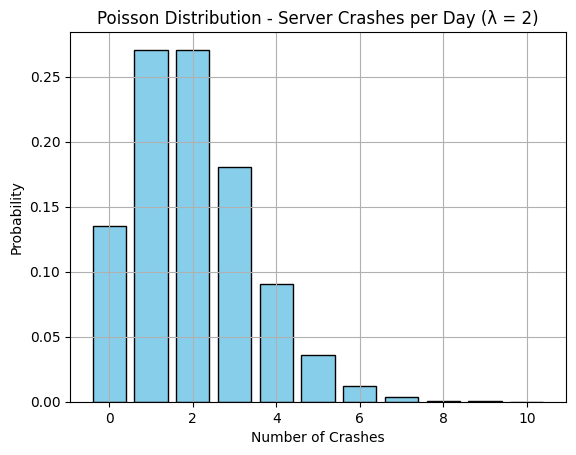

In [5]:
import math
import matplotlib.pyplot as plt

def poisson_pmf(x, lam):
    return (math.exp(-lam) * (lam ** x)) / math.factorial(x)

# Parameters
lam = 2  # average number of server crashes per day
x_values = list(range(0, 11))  # 0 to 10 crashes
y_values = [poisson_pmf(x, lam) for x in x_values]

# Plotting
plt.bar(x_values, y_values, color='skyblue', edgecolor='black')
plt.title("Poisson Distribution - Server Crashes per Day (λ = 2)")
plt.xlabel("Number of Crashes")
plt.ylabel("Probability")
plt.grid(True)
plt.show()


### 🔍 Observation

The graph shows the probabilities of having 0 to 10 server crashes in one day when the average number of crashes (λ) is 2.

- The highest bars are at **1 and 2 crashes**, which are the most likely outcomes — each with a probability around **27%**.
- There is still a significant chance (around **18%**) of seeing **3 crashes** in one day.
- The probability of **4 or more crashes** drops quickly, showing that such events are rare.
- The distribution is slightly **right-skewed**, meaning extreme crash counts are possible but unlikely.

This analysis helps DevOps teams understand what's "normal" in a production environment and when to trigger alerts or investigate anomalies.


# 2- Bayesian Princible

The Bayesian principle is a principle that deals with  updating your belief about an uncertain event based on new evidence. At its core, it  tells you how to revise probabilities when new data becomes available. bold text

## In simple terms, the theorem states that:

$$
\text{Posterior} = \frac{\text{Likelihood} \times \text{Prior}}{\text{Evidence}}
$$

**Where:**

     Prior: What you believed *before* seeing new evidence
     Likelihood:  How likely the new evidence is *if* your belief were true    
     Evidence: Overall chance of seeing this evidence (regardless of truth)
     Posterior:   What you believe *after* seeing the evidence                 





**Scenario: Financial Fraud Detection using the Bayesian Principle**

Fraud is rare but costly, and manually inspecting every transaction is impractical. To address this, banks use an **automated fraud detection** system that flags suspicious transactions based on behavioral patterns such as unexpected locations, unusually high amounts, or odd timing. As a **data scientist** at a bank, our role is to help detect **fraudulent credit card transactions**, those not authorized by the legitimate cardholder, amid the vast number of daily transactions.

# Python Implementation

In [7]:
# Bayesian Fraud Detection

# Step 1: Prior probabilities
P_fraud = 0.001                  # P(Fraud)
P_legit = 1 - P_fraud            # P(No Fraud)

# Step 2: Likelihoods
P_flag_given_fraud = 0.98        # P(Flagged | Fraud)
P_flag_given_legit = 0.01        # P(Flagged | Legitimate)

# Step 3: Evidence - total probability of being flagged
P_flag = (P_flag_given_fraud * P_fraud) + (P_flag_given_legit * P_legit)

# Step 4: Posterior - probability of fraud given flagged
P_fraud_given_flag = (P_flag_given_fraud * P_fraud) / P_flag

# Step 5: Print results
print("Bayesian Fraud Detection")
print("--------------------------")
print(f"Prior P(Fraud): {P_fraud:.5f}")
print(f"Likelihood P(Flagged | Fraud): {P_flag_given_fraud:.2f}")
print(f"False Positive Rate P(Flagged | Legit): {P_flag_given_legit:.2f}")
print(f"Total P(Flagged): {P_flag:.5f}")
print(f"Posterior P(Fraud | Flagged): {P_fraud_given_flag:.5f}")


Bayesian Fraud Detection
--------------------------
Prior P(Fraud): 0.00100
Likelihood P(Flagged | Fraud): 0.98
False Positive Rate P(Flagged | Legit): 0.01
Total P(Flagged): 0.01097
Posterior P(Fraud | Flagged): 0.08933


# Visualizing Prior vs Posterior

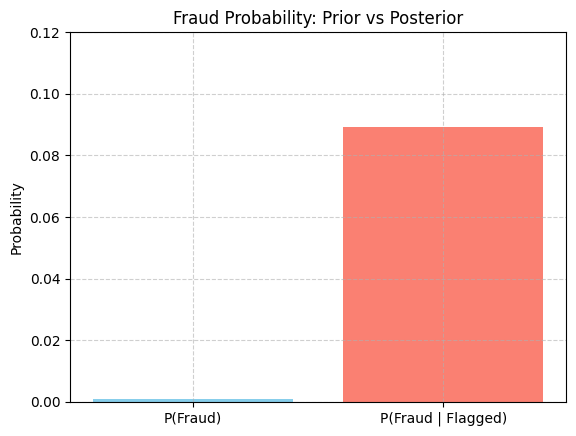

In [8]:
import matplotlib.pyplot as plt

labels = ['P(Fraud)', 'P(Fraud | Flagged)']
values = [P_fraud, P_fraud_given_flag]

plt.bar(labels, values, color=['skyblue', 'salmon'])
plt.title("Fraud Probability: Prior vs Posterior")
plt.ylabel("Probability")
plt.ylim(0, 0.12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# Interpretation

Even though the fraud detection system is highly accurate (98%), the actual probability that a flagged transaction is fraudulent is only ~8.93%.

Why?
Because:


*   Fraud is extremely rare (only 0.1% of all transactions),
*   And the false positives (1% of millions of legit transactions) dominate the flagged pool.




# Significance

This insight affects how we design and use fraud detection systems:

1. Don’t Trust Flags Blindly: A flag doesn’t mean it’s definitely fraud.
Analysts should combine system flags with other evidence (customer profile, recent activity).

2. Threshold Tuning: If the cost of false positives is high (e.g. blocking a legit user), you might raise the threshold for what gets flagged.

3. Bayesian Updating:
As more evidence becomes available (e.g., a second flag from a different model), we can recalculate the posterior—Bayesian inference allows this fluid updating.

4. Cost-Aware Decision Making:
We can use expected value analysis: weigh the cost of missing fraud vs the cost of annoying legit customers.

In  Summary
Bayes' probablity helps answer:

**“Now that I’ve seen this, how should I revise my belief about that?”** Giving  us a **smart**, **mathematically**  and sound way to:
Avoid false alarms, Quantify risk, and Support decisions with data


Dataset Created:
X: [1 3]
y: [3 6]


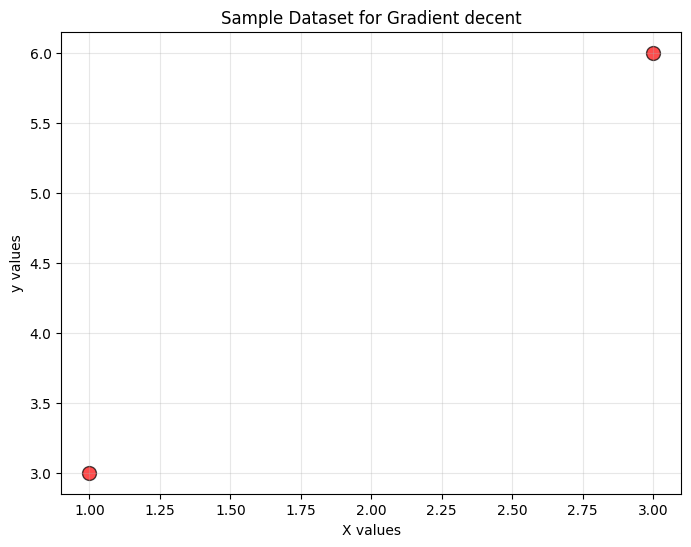

In [12]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import approx_fprime
import pandas as pd

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
X = np.array([1, 3])
y = np.array([3, 6])

print("Dataset Created:")
print(f"X: {X}")
print(f"y: {y}")

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='red', s=100, alpha=0.7, edgecolor='black')
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Sample Dataset for Gradient decent')
plt.grid(True, alpha=0.3)
plt.show()

Helper Functions

In [14]:
def cost_function(params, X, y):
    """Calculate Mean Squared Error for SciPy optimization"""
    m, b = params
    n = len(X)
    predictions = m * X + b
    cost = (1/(2*n)) * np.sum((predictions - y)**2)
    return cost

def compute_gradients(m, b, X, y):
    # n = len(X)
    # predictions = m * X + b
    # dm = -2 * np.sum(X * (y - predictions))
    # db = -2 * np.sum(y - predictions)
    # dm /= n
    # db /= n
    def cost_func(params):
        m_temp, b_temp = params
        y_pred = m_temp * X + b_temp
        return np.mean((y - y_pred) ** 2)

    epsilon = np.sqrt(np.finfo(float).eps)
    params = np.array([m, b])
    grad = approx_fprime(params, cost_func, epsilon)

    return grad[0], grad[1]

def make_predictions(m, b, X):
    X = np.array(X)
    return m * X + b


## Manual Gradient Descent Implementation

In [15]:
def manual_gradient_descent(X, y, learning_rate=0.1, max_iterations=1000, verbose=True):

    m_history = []
    b_history = []
    error_history = []

    m = -1
    b = 1


    for i in range(max_iterations):
        m_history.append(m)
        b_history.append(b)

        n = len(X)
        predictions = m * X + b
        current_cost = (1/(2*n)) * np.sum((predictions - y)**2)
        error_history.append(current_cost)

        dm, db = compute_gradients(m, b, X, y)

        m_new = m - learning_rate * dm
        b_new = b - learning_rate * db

        if verbose and (i % 5 == 0 or i < 10):
            print(f"Iteration {i}:")
            print(f"  Current: m = {m:.2f}, b = {b:.2f}")
            print(f"  Cost = {current_cost:.2f}")
            print(f"  Gradients: dm = {dm:.2f}, db = {db:.2f}")
            print(f"  ⚡ Updates:")
            print(f"     m = {m:.2f} - {learning_rate} × {dm:.2f} = {m_new:.2f}")
            print(f"     b = {b:.2f} - {learning_rate} × {db:.2f} = {b_new:.2f}")
            print()

        m = m_new
        b = b_new


    if verbose:
        print("-" * 60)
        print(f"Final Results:")
        print(f"m (slope) = {m:.2f}")
        print(f"b (intercept) = {b:.2f}")
        print(f"Final cost = {current_cost:.2f}")

    return m, b, m_history, b_history, error_history

m_manual, b_manual, m_hist, b_hist, error_hist = manual_gradient_descent(X, y, learning_rate=0.1, max_iterations=4)


Iteration 0:
  Current: m = -1.00, b = 1.00
  Cost = 18.25
  Gradients: dm = -27.00, db = -11.00
  ⚡ Updates:
     m = -1.00 - 0.1 × -27.00 = 1.70
     b = 1.00 - 0.1 × -11.00 = 2.10

Iteration 1:
  Current: m = 1.70, b = 2.10
  Cost = 0.52
  Gradients: dm = 4.40, db = 2.00
  ⚡ Updates:
     m = 1.70 - 0.1 × 4.40 = 1.26
     b = 2.10 - 0.1 × 2.00 = 1.90

Iteration 2:
  Current: m = 1.26, b = 1.90
  Cost = 0.03
  Gradients: dm = -0.80, db = -0.16
  ⚡ Updates:
     m = 1.26 - 0.1 × -0.80 = 1.34
     b = 1.90 - 0.1 × -0.16 = 1.92

Iteration 3:
  Current: m = 1.34, b = 1.92
  Cost = 0.02
  Gradients: dm = 0.06, db = 0.19
  ⚡ Updates:
     m = 1.34 - 0.1 × 0.06 = 1.33
     b = 1.92 - 0.1 × 0.19 = 1.90

------------------------------------------------------------
Final Results:
m (slope) = 1.33
b (intercept) = 1.90
Final cost = 0.02


## SciPy Optimization for Comparison


In [16]:
def scipy_gradient_descent(X, y):

    initial_params = [1, -1]

    result = minimize(cost_function, initial_params, args=(X, y), method='BFGS')

    m_scipy, b_scipy = result.x
    print(f"SciPy m (slope) = {m_scipy:.2f}")
    print(f"SciPy b (intercept) = {b_scipy:.2f}")
    print(f"SciPy final cost = {result.fun:.2f}")
    print(f"Optimization success: {result.success}")
    print(f"Number of iterations: {result.nit}")

    return m_scipy, b_scipy

m_scipy, b_scipy = scipy_gradient_descent(X, y)


SciPy m (slope) = 1.50
SciPy b (intercept) = 1.50
SciPy final cost = 0.00
Optimization success: True
Number of iterations: 8


## Visualization - Parameter Evolution

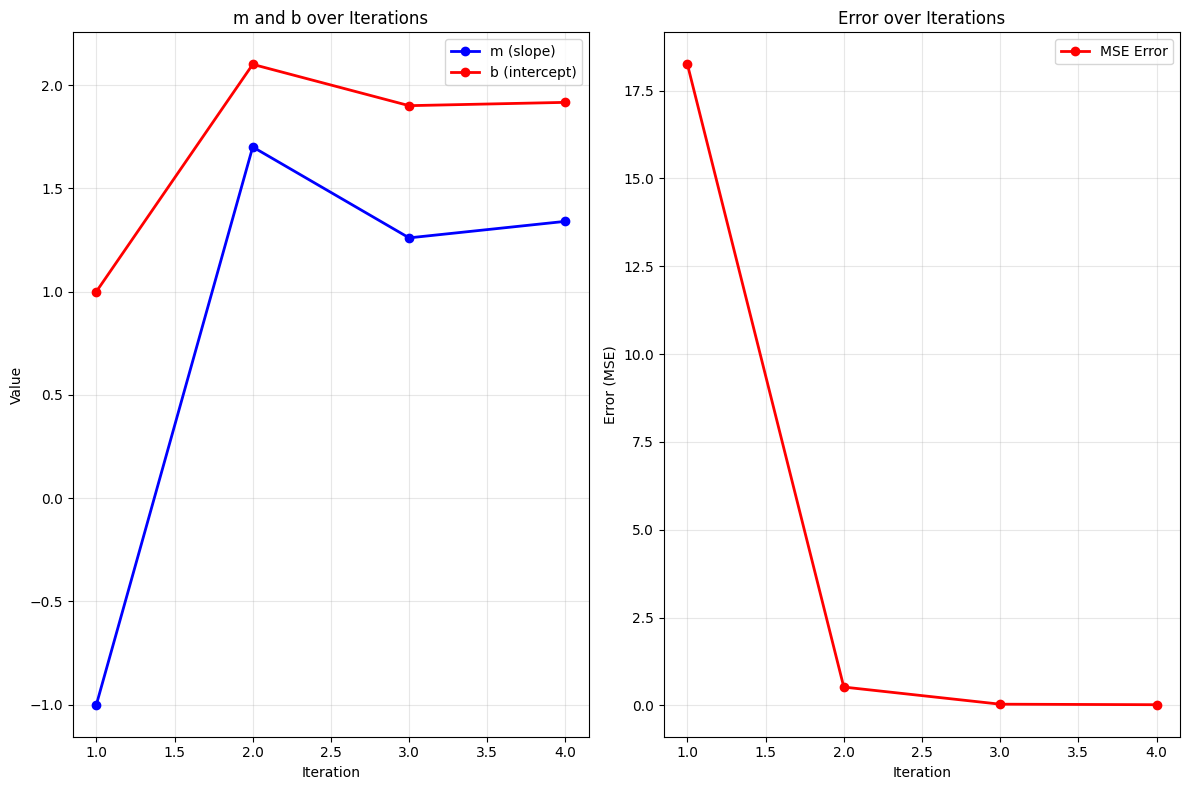

Total iterations completed: 4
Initial cost: 18.25
Final cost: 0.02
Cost reduction: 99.90%


In [17]:
plt.subplot(1, 2, 1)
iterations = range(1, len(m_hist) + 1)  # Start from 1 to match working version
plt.plot(iterations, m_hist, 'b-', label='m (slope)', linewidth=2, marker='o', markersize=6)
plt.plot(iterations, b_hist, 'r-', label='b (intercept)', linewidth=2, marker='o', markersize=6)
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('m and b over Iterations')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(iterations, error_hist, 'red', linewidth=2, marker='o', markersize=6, label='MSE Error')
plt.xlabel('Iteration')
plt.ylabel('Error (MSE)')
plt.title('Error over Iterations')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print(f"Total iterations completed: {len(iterations)}")
print(f"Initial cost: {error_hist[0]:.2f}")
print(f"Final cost: {error_hist[-1]:.2f}")
print(f"Cost reduction: {((error_hist[0] - error_hist[-1]) / error_hist[0] * 100):.2f}%")



## Comparison Visualization


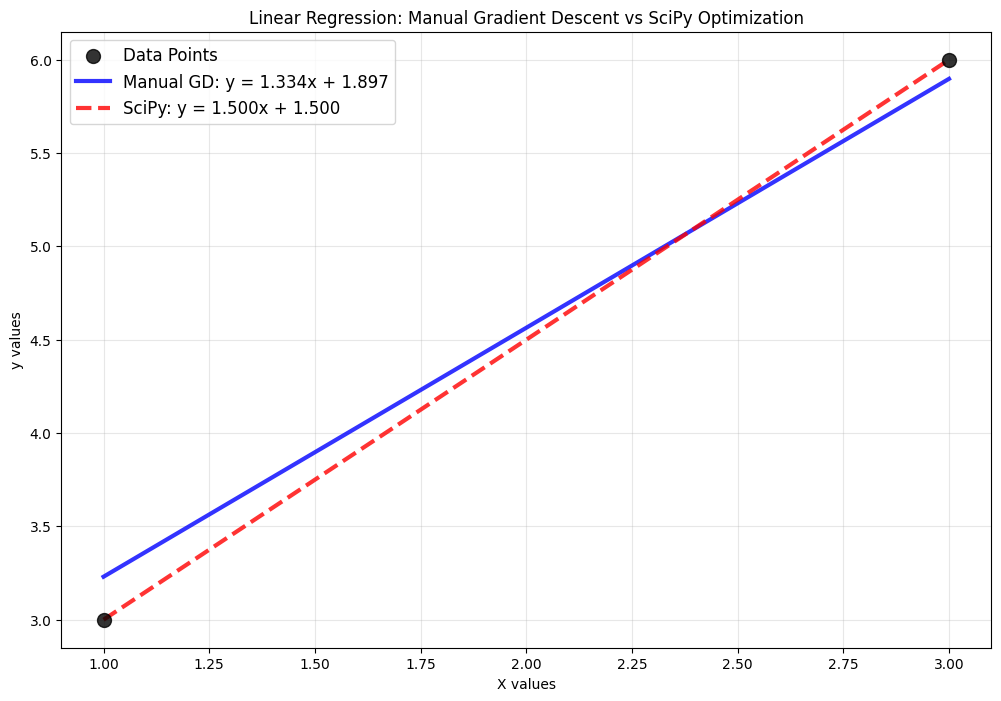

Parameter Differences:
Slope difference: 0.16639896
Intercept difference: 0.39679778
Methods ⚠️ have some differences


In [18]:
plt.figure(figsize=(12, 8))

plt.scatter(X, y, color='black', s=100, label='Data Points', zorder=5, alpha=0.8)

y_pred_manual = make_predictions(m_manual, b_manual, X)
plt.plot(X, y_pred_manual, 'b-', linewidth=3,
         label=f'Manual GD: y = {m_manual:.3f}x + {b_manual:.3f}', alpha=0.8)

y_pred_scipy = make_predictions(m_scipy, b_scipy, X)
plt.plot(X, y_pred_scipy, 'r--', linewidth=3,
         label=f'SciPy: y = {m_scipy:.3f}x + {b_scipy:.3f}', alpha=0.8)

plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Linear Regression: Manual Gradient Descent vs SciPy Optimization')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

diff_m = abs(m_manual - m_scipy)
diff_b = abs(b_manual - b_scipy)
print(f"Parameter Differences:")
print(f"Slope difference: {diff_m:.8f}")
print(f"Intercept difference: {diff_b:.8f}")
print(f"Methods {'✅ match very closely!' if diff_m < 0.001 and diff_b < 0.001 else '⚠️ have some differences'}")


## Detailed Predictions Analysis

In [19]:
print(f"\n🔧 Manual Gradient Descent Results: y = {m_manual:.2f}x + {b_manual:.2f}")
print("-" * 50)
manual_errors = []
for i, (x_val, y_true, y_pred) in enumerate(zip(X, y, y_pred_manual)):
    error = abs(y_true - y_pred)
    manual_errors.append(error)
    print(f"X[{i+1:2d}] = {x_val:2d}: True = {y_true:5.2f}, Predicted = {y_pred:5.2f}, Error = {error:5.3f}")

manual_mae = np.mean(manual_errors)
manual_rmse = np.sqrt(np.mean([(y_true - y_pred)**2 for y_true, y_pred in zip(y, y_pred_manual)]))

print(f"\n📊 Manual GD Performance:")
print(f"   Mean Absolute Error (MAE): {manual_mae:.2f}")
print(f"   Root Mean Square Error (RMSE): {manual_rmse:.2f}")

print(f"\n🔬 SciPy Optimization Results: y = {m_scipy:.2f}x + {b_scipy:.2f}")
print("-" * 50)
scipy_errors = []
for i, (x_val, y_true, y_pred) in enumerate(zip(X, y, y_pred_scipy)):
    error = abs(y_true - y_pred)
    scipy_errors.append(error)
    print(f"X[{i+1:2d}] = {x_val:2d}: True = {y_true:5.2f}, Predicted = {y_pred:5.2f}, Error = {error:5.3f}")

scipy_mae = np.mean(scipy_errors)
scipy_rmse = np.sqrt(np.mean([(y_true - y_pred)**2 for y_true, y_pred in zip(y, y_pred_scipy)]))

print(f"\nSciPy Performance:")
print(f"Mean Absolute Error (MAE): {scipy_mae:.2f}")
print(f"Root Mean Square Error (RMSE): {scipy_rmse:.2f}")


🔧 Manual Gradient Descent Results: y = 1.33x + 1.90
--------------------------------------------------
X[ 1] =  1: True =  3.00, Predicted =  3.23, Error = 0.230
X[ 2] =  3: True =  6.00, Predicted =  5.90, Error = 0.102

📊 Manual GD Performance:
   Mean Absolute Error (MAE): 0.17
   Root Mean Square Error (RMSE): 0.18

🔬 SciPy Optimization Results: y = 1.50x + 1.50
--------------------------------------------------
X[ 1] =  1: True =  3.00, Predicted =  3.00, Error = 0.000
X[ 2] =  3: True =  6.00, Predicted =  6.00, Error = 0.000

SciPy Performance:
Mean Absolute Error (MAE): 0.00
Root Mean Square Error (RMSE): 0.00
